<a href="https://colab.research.google.com/github/ashleyferreiraa/Big-Data-Analytics-project/blob/main/Final_Data_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the working data set

Add the 3 economic factors data sets :

1. GDP
2. Mortgage Rates
3. Unemployment rates


Download,load and preprocess the **Gross Domestic Porduct (GDP) / capita data**

In [2]:
import pandas as pd

# Read the CSV file
file_path = '/content/GDP.csv'
GDP = pd.read_csv(file_path)

# Filter data based on 'GEO', 'NAICS', and 'Prices'
GDP = GDP[GDP['GEO'] == 'Canada']
GDP = GDP[GDP['North American Industry Classification System (NAICS)'] == 'All industries [T001]']
GDP = GDP[GDP['Prices'] == 'Chained (2017) dollars']

# Drop unnecessary columns
GDP = GDP.drop(columns=['DGUID', 'Seasonal adjustment', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE',
                         'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS', 'GEO', 'Prices',
                         'North American Industry Classification System (NAICS)', 'UOM', 'UOM_ID'])

# Rename the column with GDP values to 'GDP' (assuming the column with GDP values is the 'VALUE' column)
GDP = GDP.rename(columns={'VALUE': 'GDP'})

# Reset the index
GDP = GDP.reset_index(drop=True)

# Display the first 5 rows
print(GDP.head())




<ipython-input-2-8a1ec8bbbc78>:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  GDP = pd.read_csv(file_path)


  REF_DATE        GDP
0  1997-01  1204015.0
1  1997-02  1211631.0
2  1997-03  1211507.0
3  1997-04  1219735.0
4  1997-05  1224088.0


Download,load and preprocess the **Mortgage Rates data**

In [3]:
import pandas as pd

# Load dataset
file_path = '/content/Mortgage Rates.csv'
mortgage_rates = pd.read_csv(file_path)

# Drop unnecessary columns
mortgage_rates = mortgage_rates.drop(columns=['Conventional mortgage - 1-year', 'Conventional mortgage - 3-year', 'Prime rate'])

# Convert 'date' column to datetime
mortgage_rates['date'] = pd.to_datetime(mortgage_rates['date'])

# Extract Year and Month
mortgage_rates['Year'] = mortgage_rates['date'].dt.year
mortgage_rates['Month'] = mortgage_rates['date'].dt.month

# Group by Year & Month and calculate the mean mortgage rate
mortgage_rates = mortgage_rates.groupby(['Year', 'Month'])['Conventional mortgage - 5-year'].mean().reset_index()

# Rename the mortgage rate column
mortgage_rates = mortgage_rates.rename(columns={'Conventional mortgage - 5-year': 'Mortgage Rate'})

# Convert Year & Month into a proper date format (YYYY-MM)
mortgage_rates['REF_DATE'] = mortgage_rates['Year'].astype(str) + '-' + mortgage_rates['Month'].astype(str).str.zfill(2)

# Drop the separate Year & Month columns if not needed
mortgage_rates = mortgage_rates.drop(columns=['Year', 'Month'])

# Display the first few rows
print(mortgage_rates.head())


   Mortgage Rate REF_DATE
0        12.0000  1975-01
1        10.9375  1975-02
2        10.6250  1975-03
3        10.6000  1975-04
4        10.8750  1975-05


Download,load and preprocess the **unemployment rates data**



In [4]:
import pandas as pd

# Load dataset
file_path = '/content/Unemployment Rates.csv'
unemployment_rates = pd.read_csv(file_path)

# Filter for Canada ONLY
canada_unemployment = unemployment_rates[unemployment_rates['GEO'] == 'Canada']

# Select only the required columns
canada_unemployment = canada_unemployment[['REF_DATE', 'VALUE']]

# Convert 'REF_DATE' to datetime format
canada_unemployment['REF_DATE'] = pd.to_datetime(canada_unemployment['REF_DATE'])

# Extract Year and Month
canada_unemployment['Year'] = canada_unemployment['REF_DATE'].dt.year
canada_unemployment['Month'] = canada_unemployment['REF_DATE'].dt.month

# Group by Year & Month and calculate the mean unemployment rate
monthly_unemployment = canada_unemployment.groupby(['Year', 'Month'])['VALUE'].mean().reset_index()

# Rename the unemployment rate column
monthly_unemployment = monthly_unemployment.rename(columns={'VALUE': 'Unemployment Rate'})

# Create a 'Year-Month' column in YYYY-MM format
monthly_unemployment['REF_DATE'] = monthly_unemployment['Year'].astype(str) + '-' + monthly_unemployment['Month'].astype(str).str.zfill(2)

# Drop Year & Month columns if not needed
monthly_unemployment = monthly_unemployment.drop(columns=['Year', 'Month'])

# Display first few rows
print(monthly_unemployment.head())


   Unemployment Rate REF_DATE
0           4.166000  1976-01
1           4.301020  1976-02
2           4.069697  1976-03
3           4.133000  1976-04
4           3.525510  1976-05


Download,load, and preprocess the *target variable* - **New housing price index (NHPI) data**

In [5]:
import pandas as pd

# Load dataset
file_path = '/content/NHPI.csv'
NHPI_data = pd.read_csv(file_path)

# Filter for Canada and Total (house and land)
NHPI_data = NHPI_data[
    (NHPI_data['GEO'] == 'Canada') &
    (NHPI_data['New housing price indexes'] == 'Total (house and land)')
]

# Keep only the required columns
NHPI_data = NHPI_data[['REF_DATE', 'VALUE']]

# Convert 'REF_DATE' to datetime format
NHPI_data['REF_DATE'] = pd.to_datetime(NHPI_data['REF_DATE'])

# Extract Year and Month
NHPI_data['Year'] = NHPI_data['REF_DATE'].dt.year
NHPI_data['Month'] = NHPI_data['REF_DATE'].dt.month

# Group by Year & Month and calculate the mean NHPI
monthly_NHPI = NHPI_data.groupby(['Year', 'Month'])['VALUE'].mean().reset_index()

# Rename the NHPI column
monthly_NHPI = monthly_NHPI.rename(columns={'VALUE': 'NHPI'})

# Create a 'Year-Month' column in YYYY-MM format
monthly_NHPI['REF_DATE'] = monthly_NHPI['Year'].astype(str) + '-' + monthly_NHPI['Month'].astype(str).str.zfill(2)

# Drop Year & Month columns if not needed
monthly_NHPI = monthly_NHPI.drop(columns=['Year', 'Month'])

# Display first few rows
print(monthly_NHPI.head())



   NHPI REF_DATE
0  38.2  1981-01
1  38.7  1981-02
2  39.3  1981-03
3  39.9  1981-04
4  40.6  1981-05


Combine all 3 data sets - aligned at the same year

In [52]:
import pandas as pd

# Ensure all datasets have 'REF_DATE' in the same format (YYYY-MM)
datasets = [monthly_NHPI, monthly_unemployment, mortgage_rates, GDP]

for dataset in datasets:
    dataset['REF_DATE'] = pd.to_datetime(dataset['REF_DATE']).dt.strftime('%Y-%m')

# Merge the datasets on 'REF_DATE'
merged_data = pd.merge(monthly_NHPI, monthly_unemployment, on='REF_DATE', how='inner')
merged_data = pd.merge(merged_data, mortgage_rates, on='REF_DATE', how='inner')
merged_data = pd.merge(merged_data, GDP, on='REF_DATE', how='inner')

# Display the merged DataFrame
print(merged_data.tail())




      NHPI REF_DATE  Unemployment Rate  Mortgage Rate        GDP
330  125.0  2024-07           5.621296           6.79  2266598.0
331  125.0  2024-08           5.973611           6.69  2269814.0
332  125.0  2024-09           5.032093           6.59  2276020.0
333  124.5  2024-10           5.039815           6.49  2283430.0
334  124.6  2024-11           5.529167           6.49  2277856.0


In [7]:

# Check for missing values in the merged dataset
print(merged_data.isnull().sum())

# Check data types of each column
merged_data.dtypes


NHPI                 0
REF_DATE             0
Unemployment Rate    0
Mortgage Rate        0
GDP                  0
dtype: int64


,0
NHPI,float64
REF_DATE,object
Unemployment Rate,float64
Mortgage Rate,float64
GDP,float64


In [8]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NHPI               335 non-null    float64
 1   REF_DATE           335 non-null    object 
 2   Unemployment Rate  335 non-null    float64
 3   Mortgage Rate      335 non-null    float64
 4   GDP                335 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.2+ KB


# Exploratory Data Analysis

                       NHPI  Unemployment Rate  Mortgage Rate       GDP
NHPI               1.000000          -0.310797      -0.589854  0.978446
Unemployment Rate -0.310797           1.000000      -0.130695 -0.389022
Mortgage Rate     -0.589854          -0.130695       1.000000 -0.604275
GDP                0.978446          -0.389022      -0.604275  1.000000


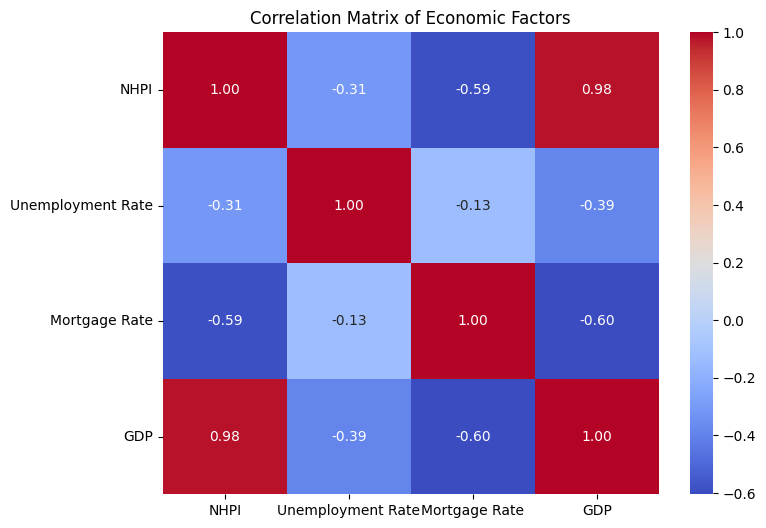

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = merged_data.drop(columns=['REF_DATE']).corr()

# Display the correlation matrix
print(correlation_matrix)

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Economic Factors')
plt.show()


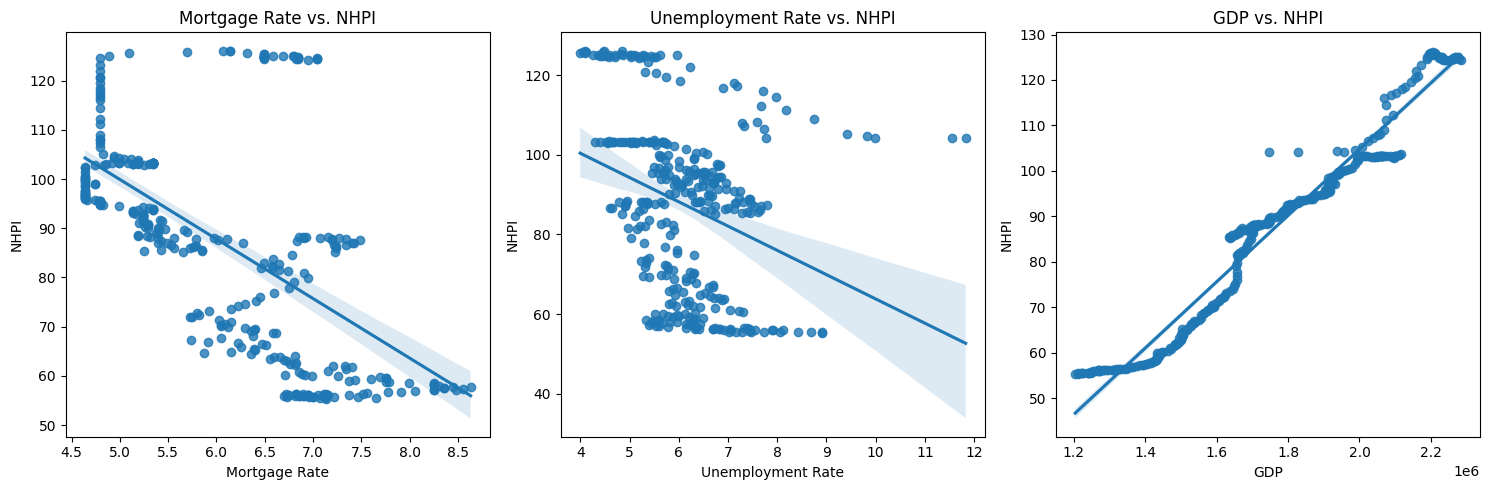

In [10]:
# Create scatter plots and regression lines
plt.figure(figsize=(15, 5))

# Mortgage Rate vs. NHPI
plt.subplot(1, 3, 1)
sns.regplot(x='Mortgage Rate', y='NHPI', data=merged_data) # Changed 'Mortgage rate' to 'Mortgage Rate'
plt.title('Mortgage Rate vs. NHPI')

# Unemployment Rate vs. NHPI
plt.subplot(1, 3, 2)
sns.regplot(x='Unemployment Rate', y='NHPI', data=merged_data) # Changed 'Unemployment rate' to 'Unemployment Rate'
plt.title('Unemployment Rate vs. NHPI')

# GDP vs. NHPI
plt.subplot(1, 3, 3)
sns.regplot(x='GDP', y='NHPI', data=merged_data)
plt.title('GDP vs. NHPI')

plt.tight_layout()
plt.show()

# Model Comparison: Random Forest & ARIMAX

Random Forest


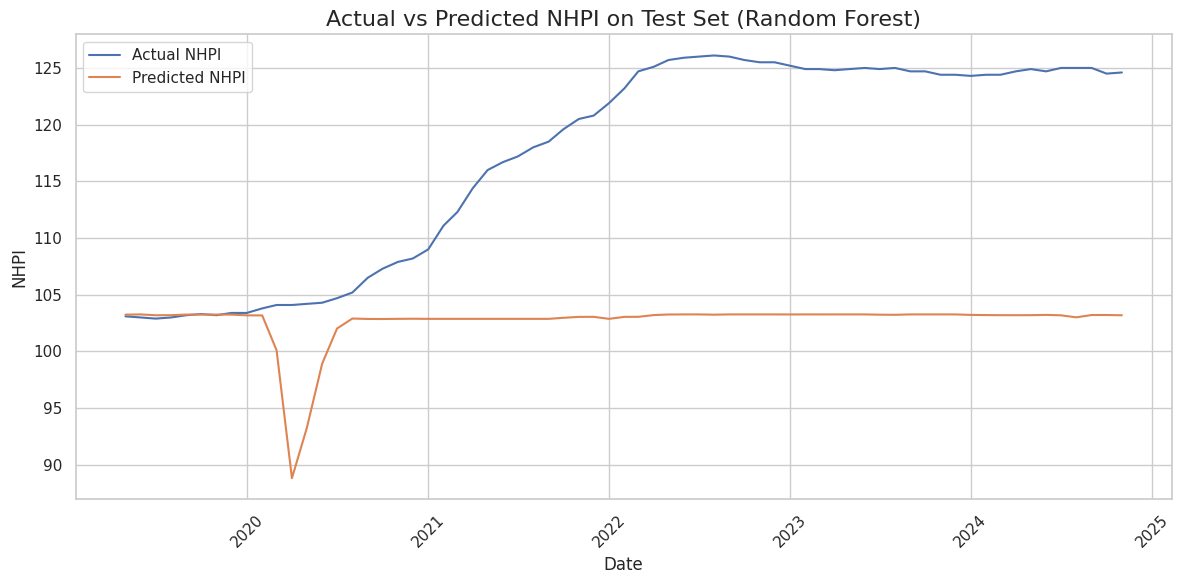

In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure REF_DATE is datetime
merged_data['REF_DATE'] = pd.to_datetime(merged_data['REF_DATE'])

# Sort data by date
merged_data = merged_data.sort_values('REF_DATE')

# Define features and target
X = merged_data.drop(columns=['NHPI', 'REF_DATE'])
y = merged_data['NHPI']
dates = merged_data['REF_DATE']  # Save dates for plotting

# Chronological split (80% train, 20% test)
split_index = int(len(merged_data) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
test_dates = dates.iloc[split_index:]

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Create DataFrame for visualization
results_df = pd.DataFrame({'REF_DATE': test_dates, 'Actual NHPI': y_test, 'Predicted NHPI': y_pred})

# Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='REF_DATE', y='Actual NHPI', label='Actual NHPI')
sns.lineplot(data=results_df, x='REF_DATE', y='Predicted NHPI', label='Predicted NHPI')
plt.title('Actual vs Predicted NHPI on Test Set (Random Forest)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('NHPI', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()
plt.show()
plt.show()

ARIMAX
(AutoRegressive Integrated Moving Average with Exogenous variables)

Grid search to find optimal parameters

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Ensure 'REF_DATE' is datetime and set as index
merged_data = merged_data.reset_index()
merged_data['REF_DATE'] = pd.to_datetime(merged_data['REF_DATE'])
merged_data = merged_data.set_index('REF_DATE')

# Exogenous variables
exog_vars = ['Unemployment Rate', 'Mortgage Rate', 'GDP']
exog = merged_data[exog_vars].copy()
scaler = StandardScaler()
exog_scaled = pd.DataFrame(scaler.fit_transform(exog), index=exog.index, columns=exog.columns)

# Split into train/test
train_size = len(merged_data) - 100
train_data = merged_data.iloc[:train_size]
test_data = merged_data.iloc[train_size:]
exog_train = exog_scaled.iloc[:train_size]
exog_test = exog_scaled.iloc[train_size:]

# Grid search parameter ranges
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = 12  # Monthly seasonality
best_score = float("inf")
best_params = None

# Loop over parameter combinations
for param in [(x[0], x[1], x[2]) for x in list(np.array(np.meshgrid(p, d, q)).T.reshape(-1, 3))]:
    for seasonal_param in [(x[0], x[1], x[2], s) for x in list(np.array(np.meshgrid(P, D, Q)).T.reshape(-1, 3))]:
        try:
            model = SARIMAX(train_data['NHPI'],
                            exog=exog_train,
                            order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            preds = results.predict(start=len(train_data),
                                    end=len(merged_data) - 1,
                                    exog=exog_test)
            rmse = np.sqrt(mean_squared_error(test_data['NHPI'], preds))
            if rmse < best_score:
                best_score = rmse
                best_params = (param, seasonal_param)
                print(f"New best RMSE: {rmse:.2f} with order={param} seasonal_order={seasonal_param}")
        except:
            continue

print("\nBest Parameters:")
print(f"Order: {best_params[0]}")
print(f"Seasonal Order: {best_params[1]}")
print(f"Test RMSE: {best_score:.2f}")


New best RMSE: 210.85 with order=(np.int64(0), np.int64(0), np.int64(0)) seasonal_order=(np.int64(0), np.int64(0), np.int64(0), 12)
New best RMSE: 7.73 with order=(np.int64(0), np.int64(0), np.int64(0)) seasonal_order=(np.int64(0), np.int64(1), np.int64(0), 12)
New best RMSE: 5.28 with order=(np.int64(0), np.int64(0), np.int64(0)) seasonal_order=(np.int64(1), np.int64(0), np.int64(0), 12)
New best RMSE: 3.89 with order=(np.int64(0), np.int64(0), np.int64(0)) seasonal_order=(np.int64(1), np.int64(0), np.int64(1), 12)

Best Parameters:
Order: (np.int64(0), np.int64(0), np.int64(0))
Seasonal Order: (np.int64(1), np.int64(0), np.int64(1), 12)
Test RMSE: 3.89


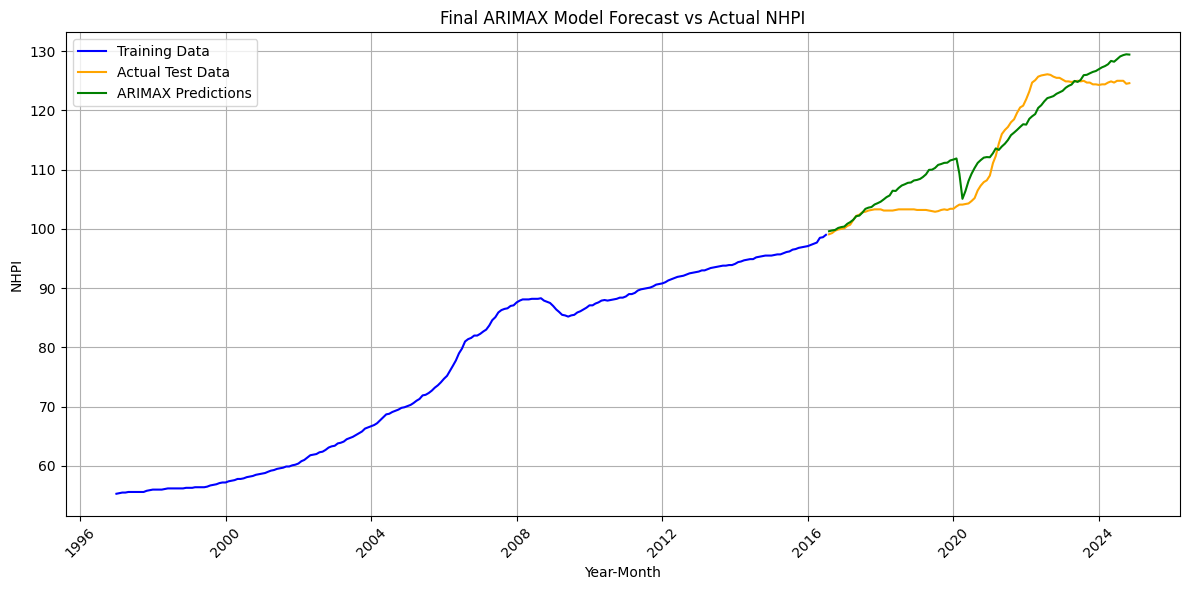

Final Test RMSE: 3.89


In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Refit the model with the best parameters
best_order = (0, 0, 0)
best_seasonal_order = (1, 0, 1, 12)

final_model = SARIMAX(train_data['NHPI'],
                      exog=exog_train,
                      order=best_order,
                      seasonal_order=best_seasonal_order,
                      enforce_stationarity=False,
                      enforce_invertibility=False)

final_result = final_model.fit(disp=False)

# Make predictions
final_predictions = final_result.predict(start=len(train_data),
                                         end=len(merged_data) - 1,
                                         exog=exog_test)

# Set the prediction index to match the test data
final_predictions.index = test_data.index

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data['NHPI'], label='Training Data', color='blue')
plt.plot(test_data['NHPI'], label='Actual Test Data', color='orange')
plt.plot(final_predictions, label='ARIMAX Predictions', color='green')

plt.title('Final ARIMAX Model Forecast vs Actual NHPI')
plt.xlabel('Year-Month')
plt.ylabel('NHPI')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print final RMSE again
final_rmse = np.sqrt(mean_squared_error(test_data['NHPI'], final_predictions))
print(f"Final Test RMSE: {final_rmse:.2f}")


Comparing the models

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# --- Random Forest metrics ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Print Random Forest results
print("Random Forest Model:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")

# --- Final ARIMAX model metrics ---
arimax_mse = mean_squared_error(test_data['NHPI'], final_predictions)
arimax_rmse = np.sqrt(arimax_mse)
arimax_mae = mean_absolute_error(test_data['NHPI'], final_predictions)
arimax_mape = np.mean(np.abs((test_data['NHPI'] - final_predictions) / test_data['NHPI'])) * 100
arimax_r2 = r2_score(test_data['NHPI'], final_predictions)

# Print Final SARIMAX results
print(f"\nFinal ARIMAX Model:")
print(f"Mean Squared Error (MSE): {arimax_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {arimax_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {arimax_mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {arimax_mape:.2f}%")
print(f"R-squared (R²): {arimax_r2:.4f}")

# --- Comparison Table ---
print("\nModel Comparison:")
print(f"{'Model':<20} {'MSE':<10} {'RMSE':<10} {'MAE':<10} {'MAPE (%)':<12} {'R²':<10}")
print(f"{'Random Forest':<20} {mse:<10.2f} {rmse:<10.2f} {mae:<10.2f} {mape:<12.2f} {r2:<10.4f}")
print(f"{'Final SARIMAX':<20} {arimax_mse:<10.2f} {arimax_rmse:<10.2f} {arimax_mae:<10.2f} {arimax_mape:<12.2f} {arimax_r2:<10.4f}")


Random Forest Model:
Mean Squared Error (MSE): 280.85
Root Mean Squared Error (RMSE): 16.76
Mean Absolute Error (MAE): 14.24
Mean Absolute Percentage Error (MAPE): 11.61%
R-squared (R²): -2.3825

Final ARIMAX Model:
Mean Squared Error (MSE): 15.16
Root Mean Squared Error (RMSE): 3.89
Mean Absolute Error (MAE): 3.17
Mean Absolute Percentage Error (MAPE): 2.86%
R-squared (R²): 0.8564

Model Comparison:
Model                MSE        RMSE       MAE        MAPE (%)     R²        
Random Forest        280.85     16.76      14.24      11.61        -2.3825   
Final SARIMAX        15.16      3.89       3.17       2.86         0.8564    
